<a href="https://colab.research.google.com/github/raghavvats/praxisconsulting/blob/main/Raghav%26Taejun%E2%80%94Predicting_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Telco Customer Churn using ML**

##**Importing Required Libraries**
Pandas, Numpy, Matplotlib, Sklearn

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

##**Data Management**

1.   Download data using gdown & Google Drive file ID.
2.   Read & save data to a variable.
3.   Remove blank spaces from data.
4.   Mapping nominal (qualitative) data to arbritary integers.
5.   Creating X and Y variables to be used in models (including numpy array variants)





In [ ]:
! gdown 1hbTBSuKUX5HBJgJDYF7JllbKFe1_s5Ww

Downloading...
From: https://drive.google.com/uc?id=1hbTBSuKUX5HBJgJDYF7JllbKFe1_s5Ww
To: /content/Supplement: Predicting Telco Customer Churn.csv
100% 978k/978k [00:00<00:00, 72.9MB/s]


In [ ]:
df = pd.read_csv('Supplement: Predicting Telco Customer Churn.csv')
original_df = pd.read_csv('Supplement: Predicting Telco Customer Churn.csv')
df = df[df["TotalCharges"] != " "]
df = df.drop("customerID", axis=1)

In [ ]:
le = LabelEncoder()
for i in df:
  if(df[i].dtype == "object"):
    qual_values = df[i].unique()
    le.fit(qual_values)
    df[i] = le.transform(df[i])

In [ ]:
y = df.iloc[:,19]
x = df.iloc[:,0:19]
y_numpy=y.to_numpy()
x_numpy=x.to_numpy()

##**Exploratory Visualizations**
Get a deeper understanding of the data

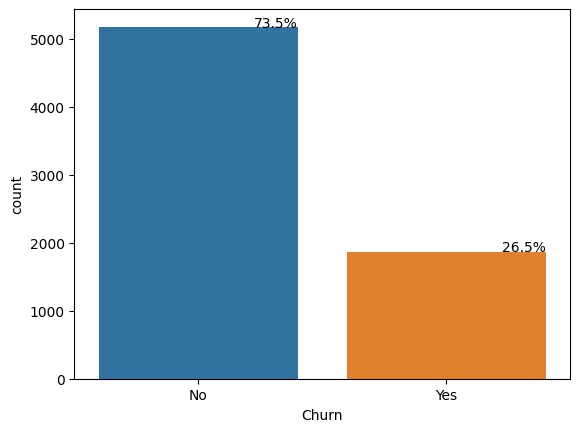

In [ ]:
ax = sns.countplot(x="Churn", data=original_df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(original_df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

<Axes: xlabel='MultipleLines', ylabel='count'>

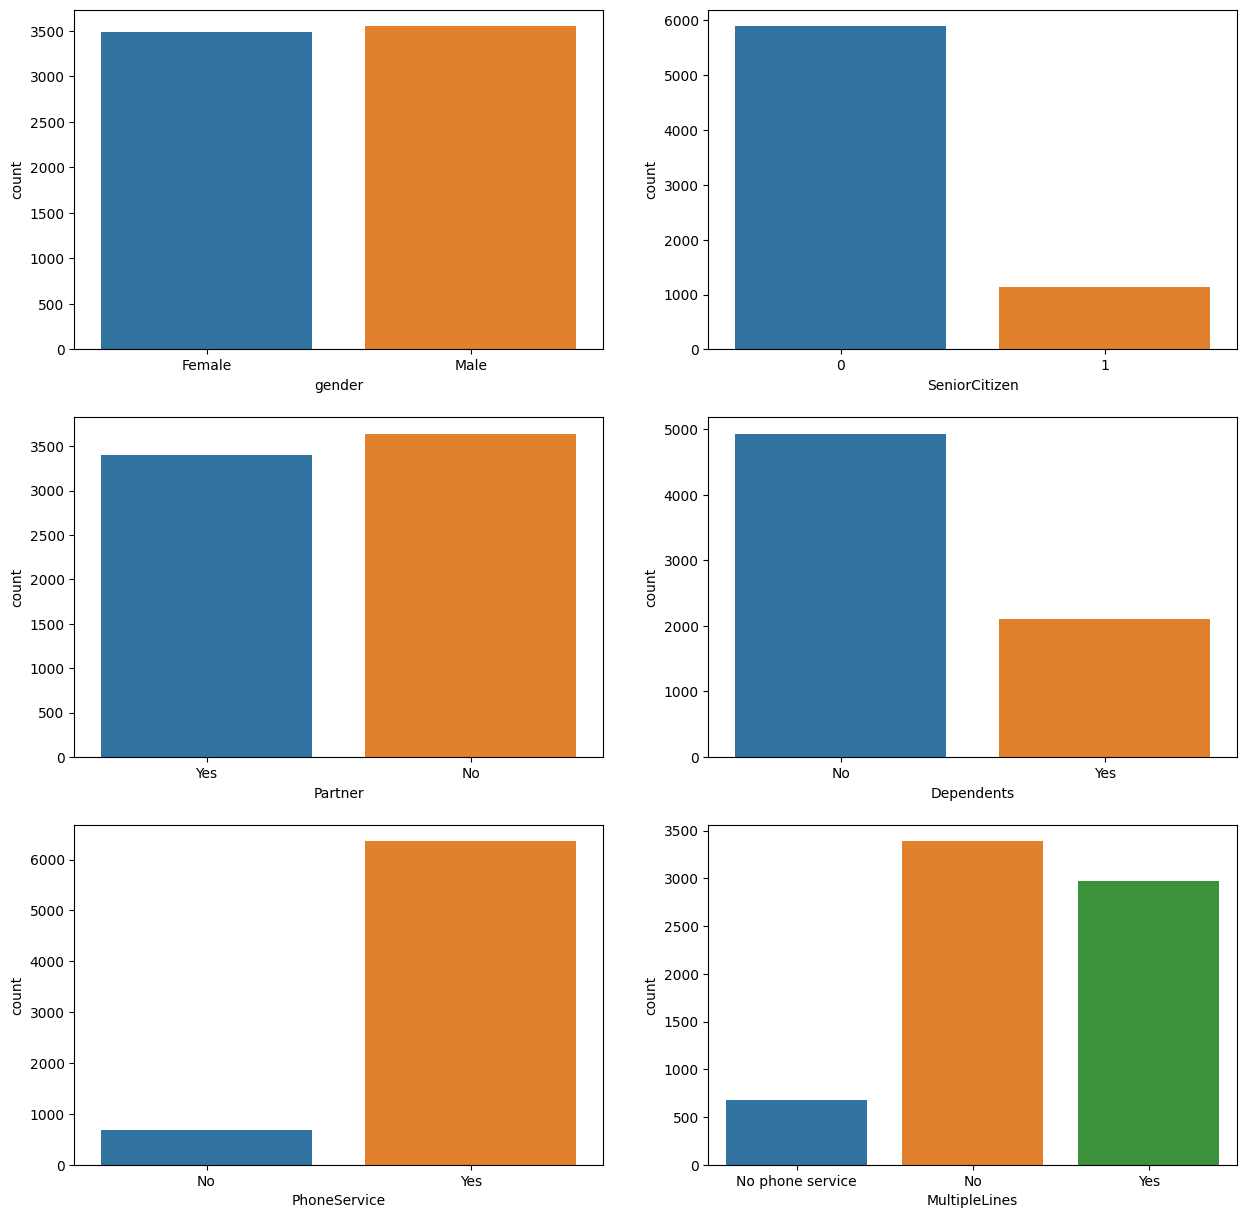

In [ ]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'gender', data = original_df)

plt.subplot(3,2,2)
sns.countplot(x = 'SeniorCitizen', data = original_df)

plt.subplot(3,2,3)
sns.countplot(x = 'Partner', data = original_df)

plt.subplot(3,2,4)
sns.countplot(x = 'Dependents', data = original_df)

plt.subplot(3,2,5)
sns.countplot(x = 'PhoneService', data = original_df)

plt.subplot(3,2,6)
sns.countplot(x = 'MultipleLines', data = original_df)

<Axes: xlabel='StreamingTV', ylabel='count'>

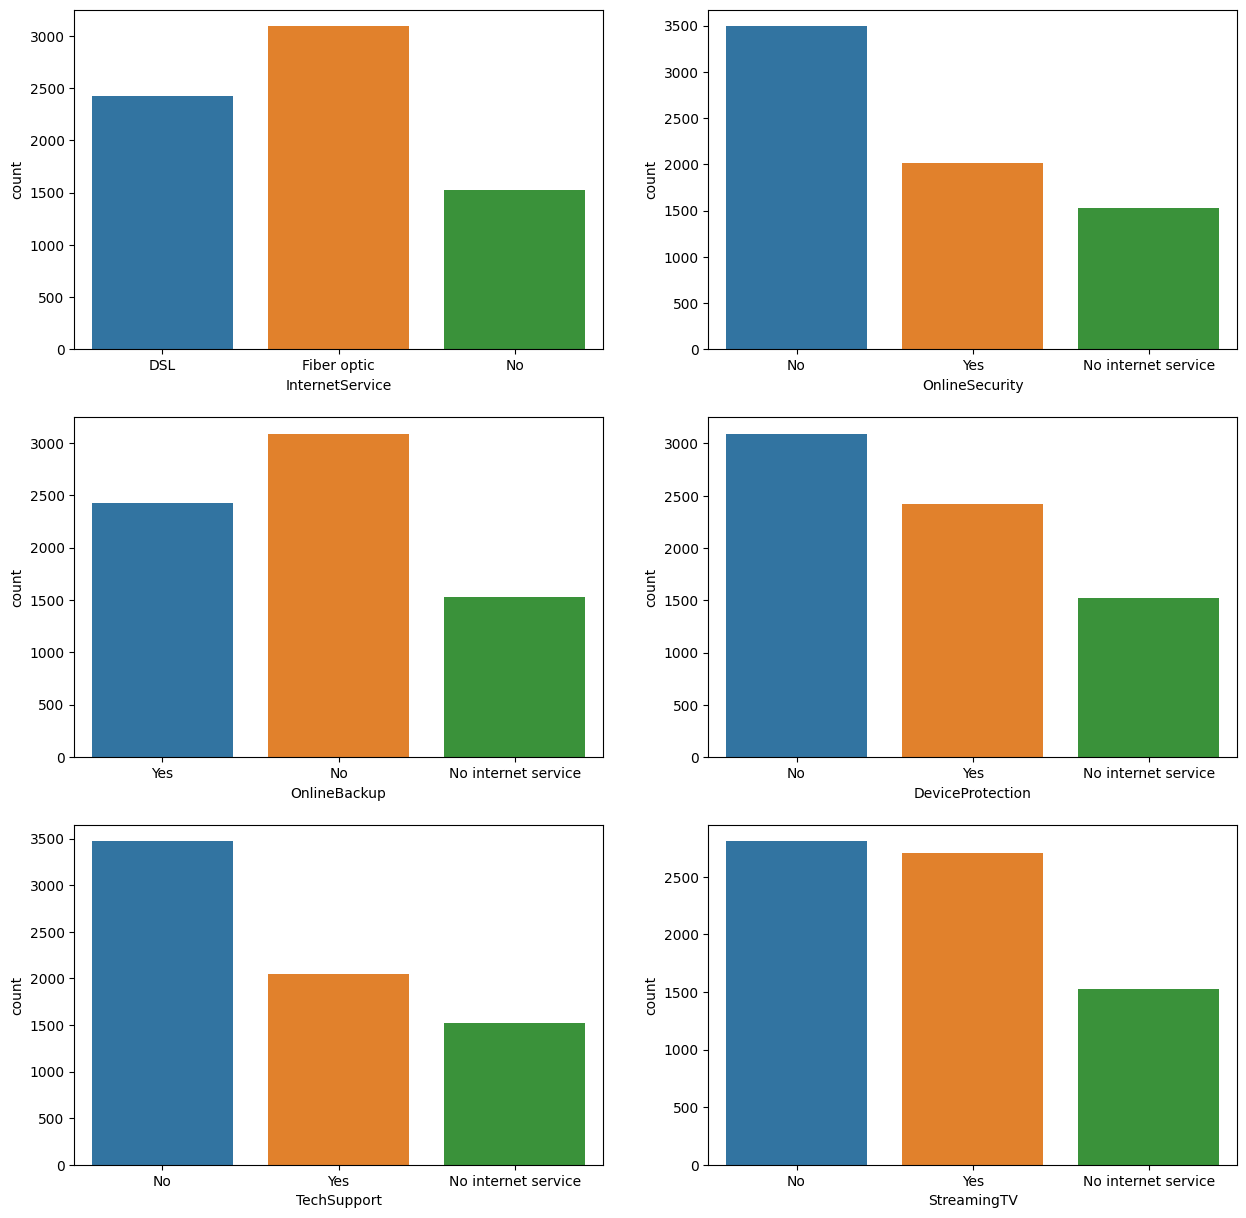

In [ ]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'InternetService', data = original_df)

plt.subplot(3,2,2)
sns.countplot(x = 'OnlineSecurity', data = original_df)

plt.subplot(3,2,3)
sns.countplot(x = 'OnlineBackup', data = original_df)

plt.subplot(3,2,4)
sns.countplot(x = 'DeviceProtection', data = original_df)

plt.subplot(3,2,5)
sns.countplot(x = 'TechSupport', data = original_df)

plt.subplot(3,2,6)
sns.countplot(x = 'StreamingTV', data = original_df)

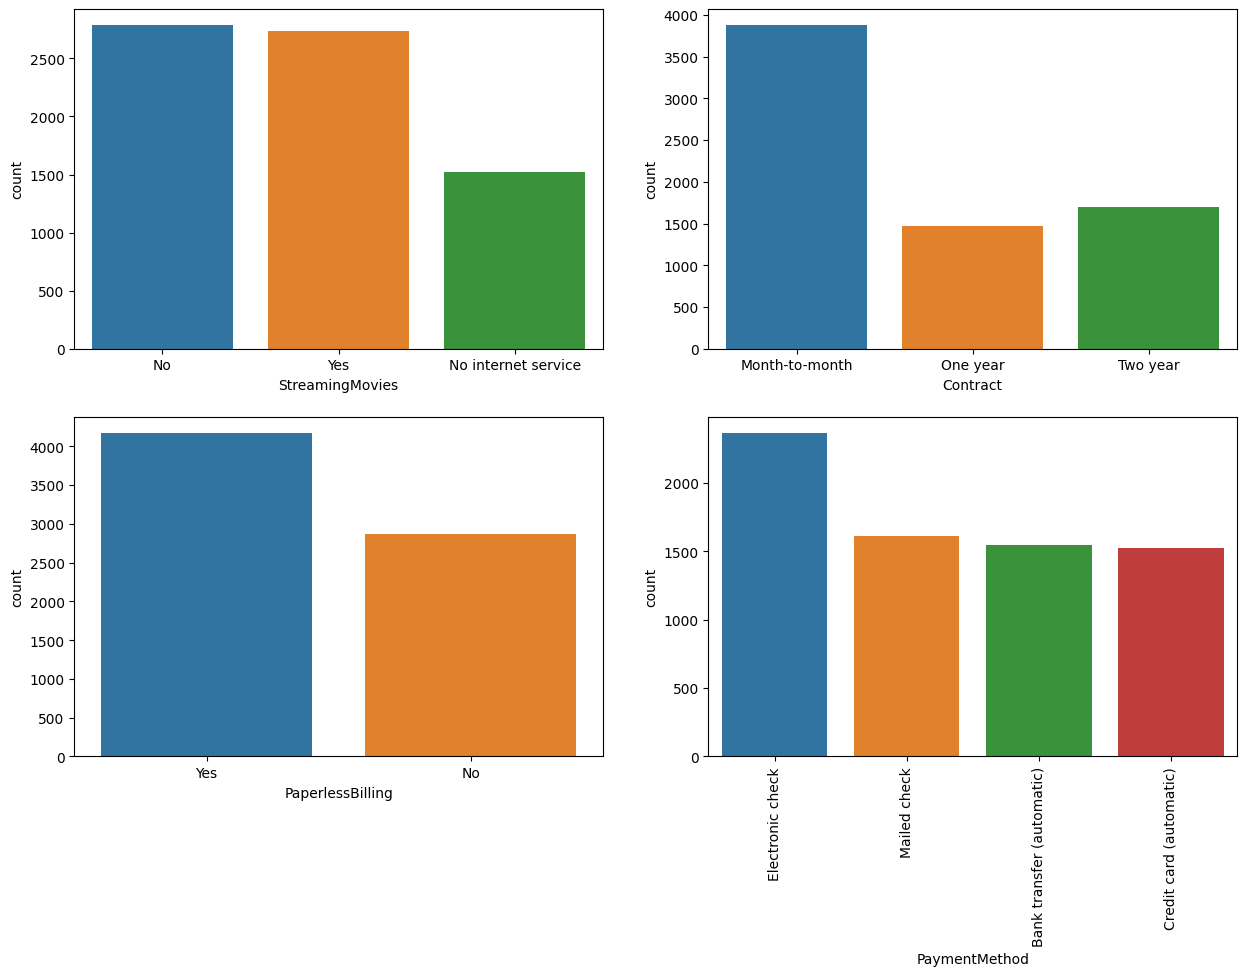

In [ ]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'StreamingMovies', data = original_df)

plt.subplot(3,2,2)
sns.countplot(x = 'Contract', data = original_df)

plt.subplot(3,2,3)
sns.countplot(x = 'PaperlessBilling', data = original_df)

plt.subplot(3,2,4)
sns.countplot(x = 'PaymentMethod', data = original_df)
plt.tick_params(axis='x', rotation=90)

##**Generating a Preliminary Model**
1.  80/20 split of training/testing
2.  Create neural network & train model
3.  Determine accuracy on training data: ~80%
4.  Run model on testing data & determine accuracy: ~80%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_numpy, y_numpy, test_size=0.2, random_state=6)

In [ ]:
scaler_train = StandardScaler().fit(X_train)
X_train_scaled = scaler_train.transform(X_train)

X_test_scaled = scaler_train.transform(X_test)

In [ ]:
model_prelim = MLPClassifier(hidden_layer_sizes=(5,5,5,5),max_iter=1000)
model_prelim.fit(X_train_scaled, y_train)
print(model_prelim.score(X_train_scaled, y_train))

0.8096


In [ ]:
y_test_predict = model_prelim.predict(X_test_scaled)
a_test_predict = model_prelim.predict_proba(X_test_scaled)
print(y_test_predict)
print(a_test_predict)

[0 0 0 ... 0 1 0]
[[0.97761349 0.02238651]
 [0.99701439 0.00298561]
 [0.98459643 0.01540357]
 ...
 [0.51836212 0.48163788]
 [0.39009915 0.60990085]
 [0.81748862 0.18251138]]


In [ ]:

print(model_prelim.score(X_test_scaled, y_test))

0.7974413646055437


##**Feature Importance**
Determining and visualizing the features that play the *largest* role in predicting whether or not a given customer will churn.

In [ ]:
scaler_train = MinMaxScaler().fit(x_numpy)
X__scaled = scaler_train.transform(x_numpy)


df_copy = df
df_copy = df_copy.drop("Churn", axis = 1)
x = pd.DataFrame(X__scaled, columns = list(df_copy.columns.values))
y = pd.DataFrame(y_numpy, columns = ['Churn'])


bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [ ]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']
featureScores.nlargest(19,'Score')

,Feature,Score
14,Contract,555.879527
8,OnlineSecurity,275.218682
11,TechSupport,261.082358
4,tenure,238.007569
1,SeniorCitizen,133.482766
3,Dependents,131.271509
9,OnlineBackup,114.720561
15,PaperlessBilling,104.979224
10,DeviceProtection,95.344002
2,Partner,81.857769


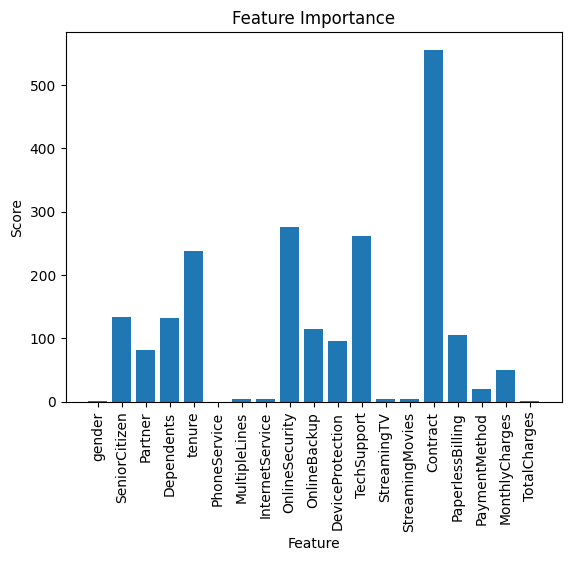

In [ ]:
plt.bar(x.columns, fit.scores_)

plt.xticks(range(len(x.columns)), x.columns, rotation='vertical')

plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Score')

plt.show()

In [ ]:
original_df = pd.read_csv('Supplement: Predicting Telco Customer Churn.csv')

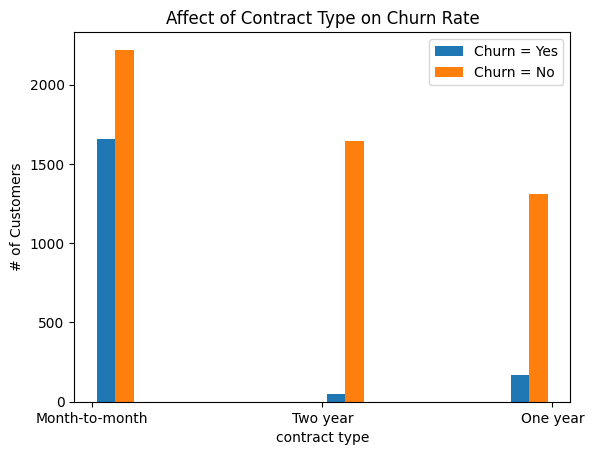

In [ ]:
Contract_churn_no = original_df[original_df.Churn=='No'].Contract
Contract_churn_yes = original_df[original_df.Churn=='Yes'].Contract

plt.xlabel("contract type")
plt.ylabel("# of Customers")
plt.title("Affect of Contract Type on Churn Rate")

plt.hist([Contract_churn_yes, Contract_churn_no],label=['Churn = Yes','Churn = No'])
plt.legend()

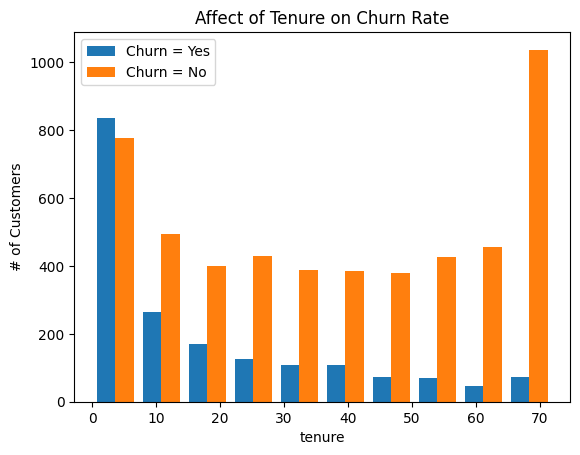

In [ ]:
tenure_churn_no = original_df[original_df.Churn=='No'].tenure
tenure_churn_yes = original_df[original_df.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("# of Customers")
plt.title("Affect of Tenure on Churn Rate")

plt.hist([tenure_churn_yes, tenure_churn_no],label=['Churn = Yes','Churn = No'])
plt.legend()

##**Generating a Final Model**
1.  Sort features by importance
2.  Select only the top features to be used in the final model
3.  Repeat steps to create prelim model
4.  Determine Accuracies: Also around 80%


In [ ]:
topFeatures = featureScores.sort_values(by='Score', ascending = False)
topFeatures = topFeatures.iloc[0:9 , 0]

In [ ]:
x_final = x[topFeatures.tolist()].copy()
x_final_numpy = x_final.to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_final_numpy, y_numpy, test_size=0.2, random_state=6)

In [ ]:
scaler_train = StandardScaler().fit(X_train)
X_train_scaled = scaler_train.transform(X_train)

X_test_scaled = scaler_train.transform(X_test)

In [ ]:
model_final = MLPClassifier(hidden_layer_sizes=(5,5,5,5),max_iter=1000)
model_final.fit(X_train_scaled, y_train)
print(model_final.score(X_train_scaled, y_train))

0.7879111111111111


In [ ]:
y_test_predict = model_final.predict(X_test_scaled)
a_test_predict = model_final.predict_proba(X_test_scaled)

In [ ]:
score_test = model_final.score(X_test_scaled, y_test)
print(score_test)

0.8081023454157783


##**Further Analysis**
Determining the accuracy of our model outside of score.


In [ ]:
cmatrix = sklearn.metrics.confusion_matrix(y_test, y_test_predict)
recall = cmatrix[0][0] / (cmatrix[0][0] + cmatrix[1][0])
precision = cmatrix[0][0]/ (cmatrix[0][0] + cmatrix[0][1])
print(cmatrix)
print(recall)
print(precision)

[[936 101]
 [169 201]]
0.8470588235294118
0.9026036644165863


*   Accuracy = Total Correct / Total Results
*   Recall = True Positive / (True Positive + False Negative)
*   Precision = True Positive / (True Positive + False Positive)